# Ejercicio Clase 3
Fecha: 23 Marzo 2022


## Aplicación de detección de outliers en espectroscopía Raman

### Detección y eliminación de rayos cósmicos (spikes) en espectros Raman

La espectroscopia Raman es una técnica analítica ampliamente utilizada que proporciona información estructural y electrónica de moléculas y sólidos. Es aplicable tanto a escala de laboratorio como de producción en masa, y tiene aplicaciones en muchos campos diferentes como la física, la química, la biología, la medicina o la industria.

Un problema típico conocido en la espectroscopia Raman es que los espectros Raman a veces están "contaminados" por spikes. Los spikes son picos positivos de ancho de banda estrecho presentes en una posición aleatoria en el espectro. Se originan cuando un rayo cósmico de alta energía impacta en el detector CCD del dispositivo utilizado para medir los espectros Raman. Estos picos son problemáticos, ya que podrían dificultar el análisis posterior, especialmente si se requiere un análisis de datos multivariado. Por tanto, uno de los primeros pasos en el tratamiento de datos espectrales Raman es la limpieza de spikes.

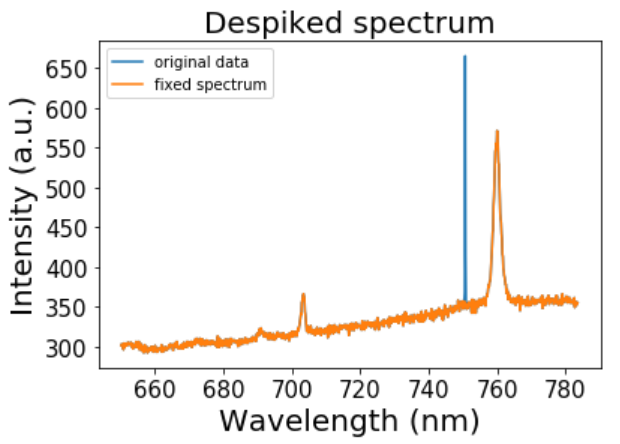

En este ejercicio trabajaremos con un espectro Raman de grafeno, contaminado con un spike. Utilizaremos el método de Hayes y Whitaker para identificar y eliminar el spike de forma automática. Podeis encontrar mas información en el artículo original ( Chemometrics and Intelligent Laboratory Systems 179 (2018): 82–84.) o en mi post de towardsdatascience:  https://towardsdatascience.com/removing-spikes-from-raman-spectra-8a9fdda0ac22

0- Importa los paquetes que vamos a utilizar: Pandas con el alias pd, matplotlib con el alias plt y numpy con el alias np

1- Carga el set de datos 

,Wavelength,Intensity
0,650.20261,301
1,650.33455,303
2,650.46649,302
3,650.59843,302
4,650.73037,299


2- Plotea el espectro (intensidad en función de la longitud de onda) y el histograma con la distribución de intensidad con bins de tamano 2. 

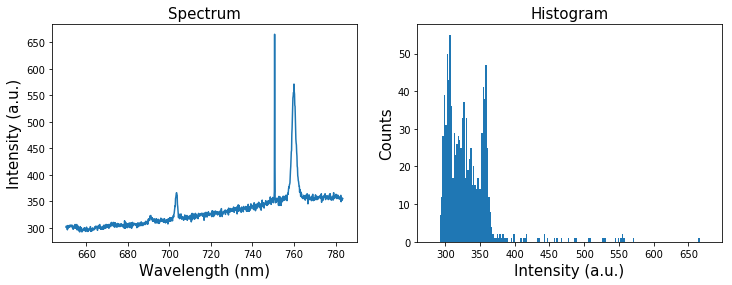

3- Define una función que calcule el valor absoluto de z-scores y llámala z_score

4- Plotea el valor absoluto del z-score de la intensidad en función de la longitud de onda y el histograma con la distribución de intensidad con bins de tamano 0.1. Dibuja una linea mostrando el límite de z-score = 3.

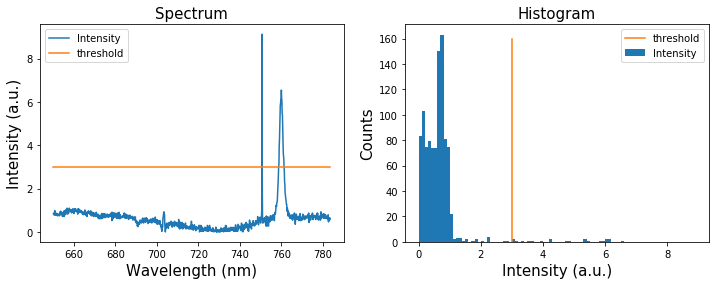

5- Cual es el número de puntos que hay por encima del threshold?

22

Parece que así no conseguimos separar el spike del resto del espectro. Probemos con z-scores robusto. 

6- Define una función que calcule el z-score robusto y llámala robust_z_score

7- Plotea el valor absoluto del z-score robusto de la intensidad en función de la longitud de onda y el histograma con la distribución de intensidad con bins de tamano 0.1. Dibuja una linea mostrando el límite de z-score = 3.

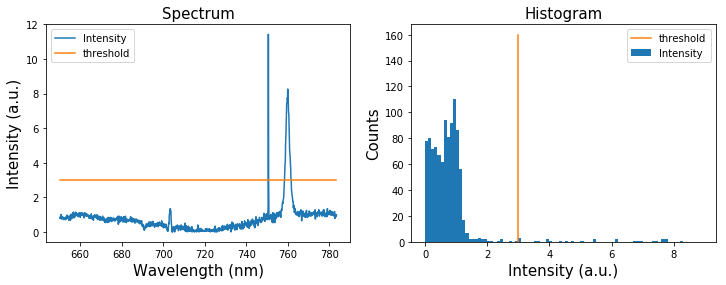

8- Cual es el número de puntos que hay por encima del threshold?

27

Parece que usar z-scores robust tampoco es suficiente para separar el spike del espectro. 

En una publicación de 2018, Whitaker and Hayes propusieron hacer uso de la alta intensidad y poca anchura del spike y utilizar la diferencia entre puntos consecutivos del espectro ∇x(i) = x(i)-x(i-1), cuyo cambio es mas suave, para calcular los z-scores, donde x(1), …, x(n) son los valores de intensidad del espectro. Este paso elimina trends lineales y lentos, mientras que mantiene los spikes estrechos.

9- Calcula los valores ∇x(i) y guardalos en una nueva columna del df. Pista, puedes usar numpy.diff.

10- Calcula los z-scores de los valores ∇x(i) y plotéalos. Plotea también su histograma, y haz un plot de linea para representar el threshold. Calcula el número de puntos detectados como outliers.


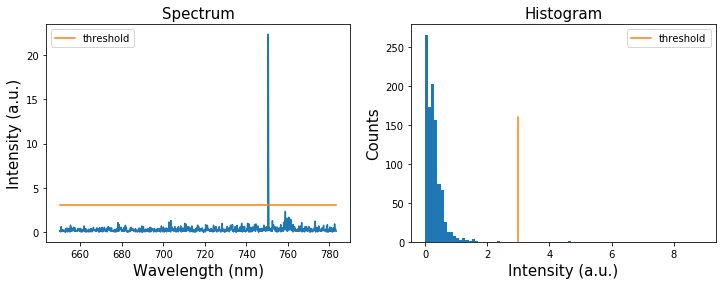

3

11- Calcula los z-scores robustos de los valores ∇x(i) y plotéalos. Plotea también su histograma, y haz un plot de linea para representar el threshold. Calcula el número de puntos detectados como outliers.

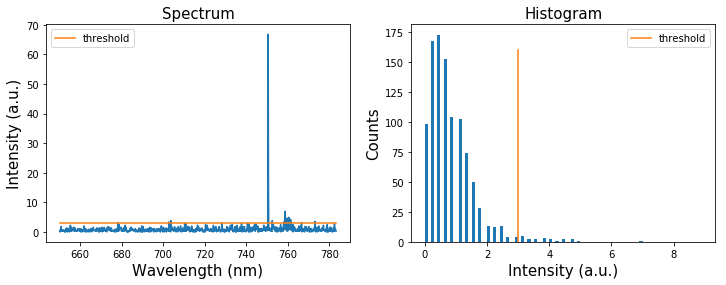

24

Una vez que hemos detectado los spikes, el siguiente paso es eliminarlos y arreglar el espectro para que tenga el mismo número de puntos. Para ello, habrá que interpolar los valores en cada punto que sea necesario haciendo uso de la media de sus valores vecinos, usando una ventana 2m+1 valores.

12 - Crea una función para reemplazar los spikes por la media de los 2m+1 valores alrededor del spike. Los inputs serán los valores de intensidad del espectro y m. Si no se te ocurre como proceder, puedes seguir los siguientes pasos: <br>
i) Crea un array booleano 'spikes' en el que si hemos detectado un spike sea True, False en caso contrario. <br>
ii) Crea un for loop que recorra todos los elementos del espectro. Si llegamos a un spike en la posición i, creamos un array con el rango i-m a i+1+m, donde m será un parametro dado como input. <br>
iii) Del array creado anteriormente, quedate con las posiciones que no corresponden al spike! Haz la media de los valores restantes para reemplazar el valor del skipe.

13 - Haz una gráfica en el que se superpongan el espectro con y sin spike.

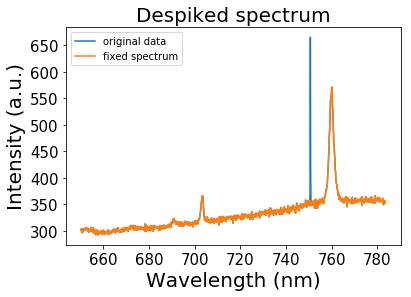